In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("suv_data.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.drop("User ID",axis=1,inplace=True)

In [5]:
x=data.drop(['Purchased'],axis=1)
y=data['Purchased']

In [6]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [7]:
x.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18596\684839951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.replace({'Gender':{'Male':0,'Female':1}},inplace=True)


In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [10]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train=train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classifier=DecisionTreeClassifier()  #by defaut= gini
classifier=classifier.fit(x_train,y_train)  #training

In [13]:
#prediction
y_pred=classifier.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.840625
[[184  30]
 [ 21  85]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       214
           1       0.74      0.80      0.77       106

    accuracy                           0.84       320
   macro avg       0.82      0.83      0.82       320
weighted avg       0.85      0.84      0.84       320



In [15]:
#print the scores training and test
print(classifier.score(x_train,y_train))

1.0


In [16]:
print(classifier.score(x_test,y_test))

0.840625


In [26]:
# by specifieying 
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=3) #random_state=45) 
classifier1=classifier1.fit(x_train,y_train)  #training
y_pred1=classifier1.predict(x_test)
print(accuracy_score(y_pred1,y_test))

0.85625


In [27]:
#print the scores on training and testing 
print(classifier1.score(x_train,y_train))

0.9625


In [28]:
print(classifier1.score(x_test,y_test))

0.85625


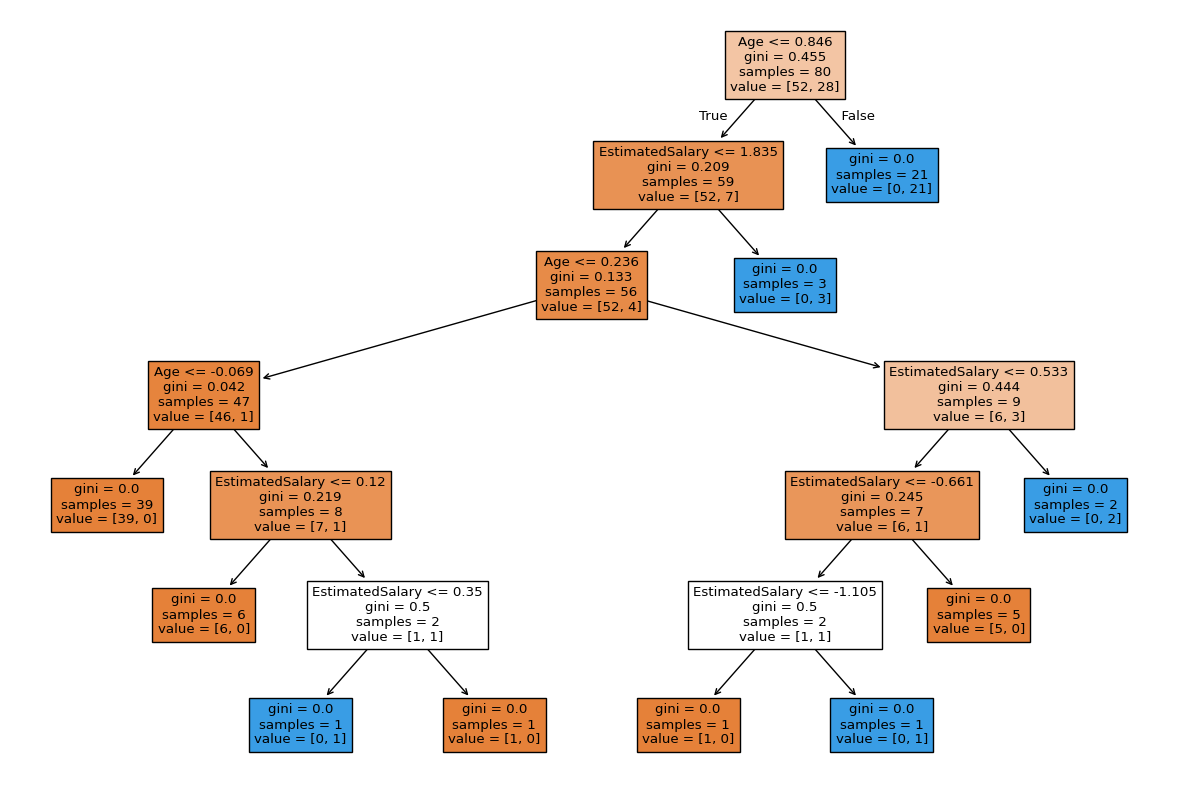

In [29]:
plt.subplots(figsize=(15,10))
plot_tree(classifier,feature_names=x.columns,filled=True)
plt.show()

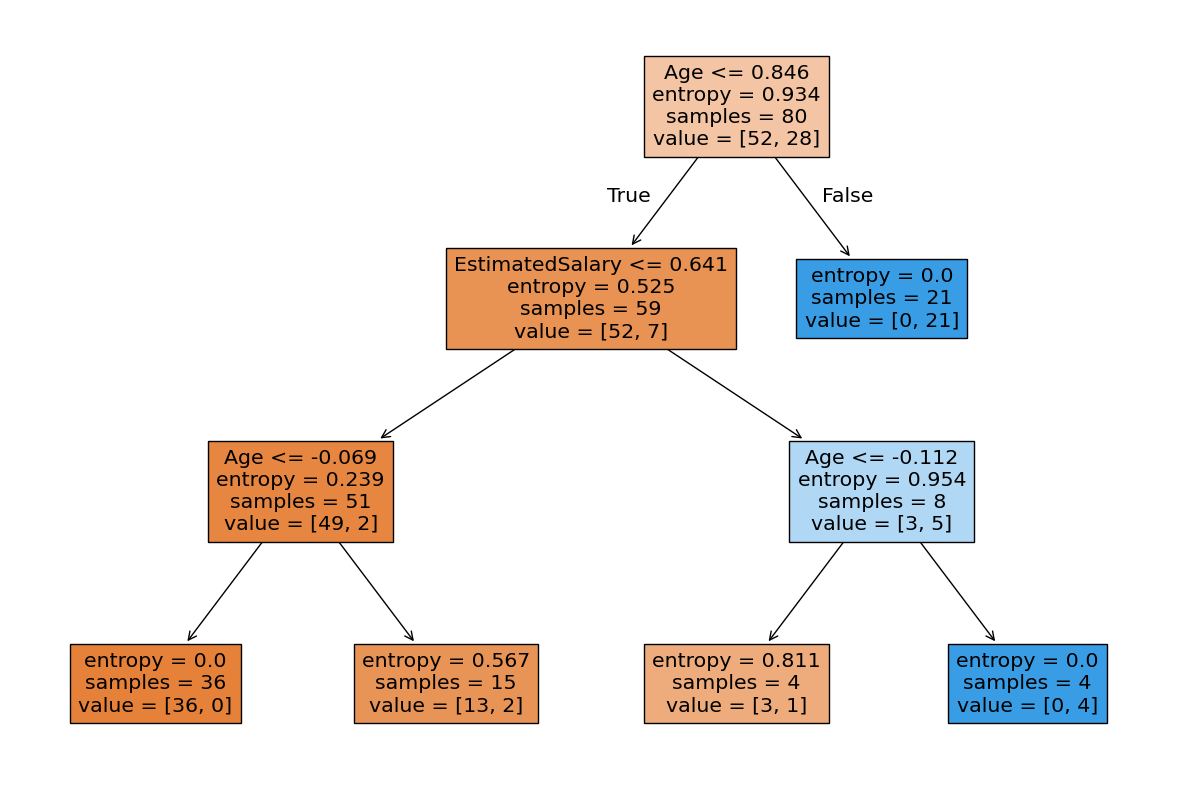

In [30]:
plt.subplots(figsize=(15,10))
plot_tree(classifier1,feature_names=x.columns,filled=True)
plt.show()